In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler
from scipy.stats import zscore
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
df = pd.read_csv('firewall.csv')
df

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,allow,314,192,122,6,15,4,2
65528,50964,80,13485,80,allow,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,drop,70,70,0,1,0,1,0
65530,54870,445,0,0,drop,70,70,0,1,0,1,0


In [3]:
df.head()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Action,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,allow,177,94,83,2,30,1,1
1,56258,3389,56258,3389,allow,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,allow,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,allow,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,allow,25358,6778,18580,31,16,13,18


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 non-null  int64 
 1   Destination Port      65532 non-null  int64 
 2   NAT Source Port       65532 non-null  int64 
 3   NAT Destination Port  65532 non-null  int64 
 4   Action                65532 non-null  object
 5   Bytes                 65532 non-null  int64 
 6   Bytes Sent            65532 non-null  int64 
 7   Bytes Received        65532 non-null  int64 
 8   Packets               65532 non-null  int64 
 9   Elapsed Time (sec)    65532 non-null  int64 
 10  pkts_sent             65532 non-null  int64 
 11  pkts_received         65532 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 6.0+ MB


In [5]:
df['Action'].value_counts()

allow         37640
deny          14987
drop          12851
reset-both       54
Name: Action, dtype: int64

In [6]:
le = LabelEncoder()
df['Action'] = le.fit_transform(df['Action'])

In [7]:
df['Action'].value_counts()

0    37640
1    14987
2    12851
3       54
Name: Action, dtype: int64

In [8]:
X = df.drop('Action', axis='columns')
X

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,57222,53,54587,53,177,94,83,2,30,1,1
1,56258,3389,56258,3389,4768,1600,3168,19,17,10,9
2,6881,50321,43265,50321,238,118,120,2,1199,1,1
3,50553,3389,50553,3389,3327,1438,1889,15,17,8,7
4,50002,443,45848,443,25358,6778,18580,31,16,13,18
...,...,...,...,...,...,...,...,...,...,...,...
65527,63691,80,13237,80,314,192,122,6,15,4,2
65528,50964,80,13485,80,4680740,67312,4613428,4675,77,985,3690
65529,54871,445,0,0,70,70,0,1,0,1,0
65530,54870,445,0,0,70,70,0,1,0,1,0


In [9]:
y = df['Action']
y

0        0
1        0
2        0
3        0
4        0
        ..
65527    0
65528    0
65529    2
65530    2
65531    2
Name: Action, Length: 65532, dtype: int32

In [10]:
X.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,65532.000000,65532.000000,65532.000000,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,65532.000000,65532.000000
mean,49391.969343,10577.385812,19282.972761,2671.049930,9.712395e+04,2.238580e+04,7.473815e+04,1.028660e+02,65.833577,41.399530,61.466505
std,15255.712537,18466.027039,21970.689669,9739.162278,5.618439e+06,3.828139e+06,2.463208e+06,5.133002e+03,302.461762,3218.871288,2223.332271
min,0.000000,0.000000,0.000000,0.000000,6.000000e+01,6.000000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
25%,49183.000000,80.000000,0.000000,0.000000,6.600000e+01,6.600000e+01,0.000000e+00,1.000000e+00,0.000000,1.000000,0.000000
50%,53776.500000,445.000000,8820.500000,53.000000,1.680000e+02,9.000000e+01,7.900000e+01,2.000000e+00,15.000000,1.000000,1.000000
75%,58638.000000,15000.000000,38366.250000,443.000000,7.522500e+02,2.100000e+02,4.490000e+02,6.000000e+00,30.000000,3.000000,2.000000
max,65534.000000,65535.000000,65535.000000,65535.000000,1.269359e+09,9.484772e+08,3.208818e+08,1.036116e+06,10824.000000,747520.000000,327208.000000


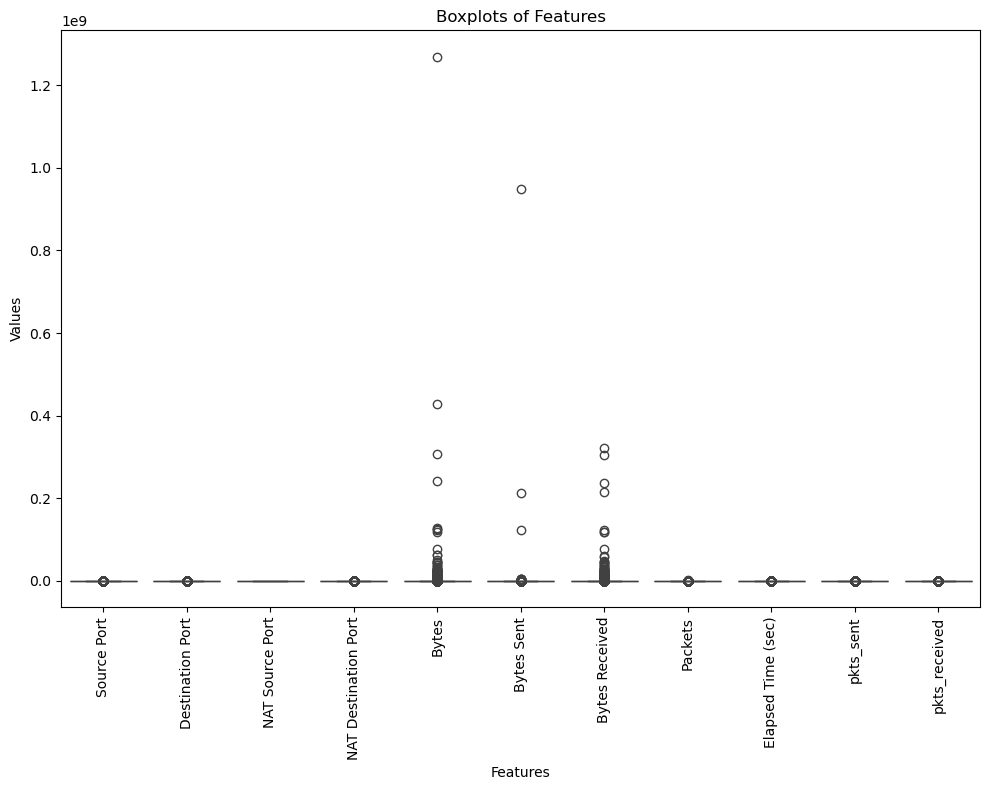

In [11]:
plt.figure(figsize=(10,8))
sns.boxplot(X)

plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Features')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

Extreme Outliers: Several features, particularly 'Bytes', 'Bytes Sent', and 'Bytes Received', have extreme outliers that extend far beyond the typical range of values. These outliers are so extreme that they're making it difficult to see the distribution of the majority of the data.
Scale Differences: There's a significant difference in scale between features. Most features are concentrated near zero on this scale, while a few ('Bytes', 'Bytes Sent', 'Bytes Received') have values extending up to 10^9.
Skewed Distributions: Many features appear to have highly skewed distributions, as evidenced by the median (the line in the box) being very close to the bottom of the box for most features.
Port Features: 'Source Port', 'Destination Port', 'NAT Source Port', and 'NAT Destination Port' seem to have a more uniform distribution compared to other features, but still contain outliers.
Time and Packet Features: 'Elapsed Time', 'pkts_sent', and 'pkts_received' also show the presence of outliers, though not as extreme as the byte-related features.

Given these observations, here are some recommendations:

Log Transformation: For features with extreme outliers and large scale differences (like 'Bytes', 'Bytes Sent', 'Bytes Received'), consider applying a log transformation. This can help compress the scale and make the distribution more normal-like.
Outlier Handling: For less extreme outliers in other features, you might consider capping them at a certain percentile (e.g., 99th) rather than removing them entirely, as they might contain valuable information for your classification task.
Feature Scaling: After handling outliers, apply feature scaling (like StandardScaler or MinMaxScaler) to ensure all features are on a comparable scale for the KNN algorithm.
Feature Engineering: Consider creating new features that might capture the relationships between related features (e.g., ratio of bytes sent to bytes received).
Outlier Investigation: Before removing any outliers, it might be worth investigating if these extreme values correspond to specific network events or anomalies that could be relevant to your classification task.

In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550
...,...,...,...,...,...,...,...,...,...,...,...
65527,0.937297,-0.568475,-0.275186,-0.266046,-0.017231,-0.005798,-0.030293,-0.018871,-0.168067,-0.011619,-0.026747
65528,0.103046,-0.568475,-0.263898,-0.266046,0.815823,0.011736,1.842607,0.890740,0.036919,0.293149,1.632037
65529,0.359149,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646
65530,0.359083,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646


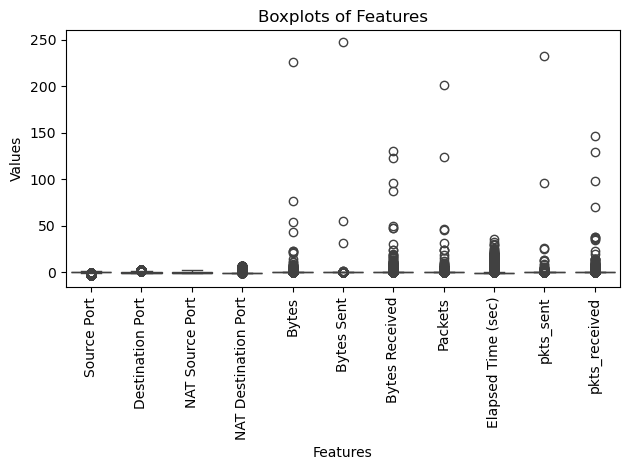

In [13]:
sns.boxplot(X_scaled)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Features')

plt.tight_layout()
plt.show()

In [14]:
X_scaled.describe()

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
count,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04,65532.000000,6.553200e+04,6.553200e+04,6.553200e+04,6.553200e+04
mean,1.457257e-16,2.081795e-17,5.941791e-17,1.040898e-17,2.168537e-18,-3.252805e-19,0.000000,-8.674147e-19,2.298649e-17,2.168537e-19,8.674147e-19
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00
min,-3.237630e+00,-5.728068e-01,-8.776748e-01,-2.742608e-01,-1.727610e-02,-5.832069e-03,-0.030342,-1.984546e-02,-2.176608e-01,-1.255093e-02,-2.764633e-02
25%,-1.369788e-02,-5.684745e-01,-8.776748e-01,-2.742608e-01,-1.727503e-02,-5.830501e-03,-0.030342,-1.984546e-02,-2.176608e-01,-1.255093e-02,-2.764633e-02
50%,2.874047e-01,-5.487083e-01,-4.762050e-01,-2.688188e-01,-1.725687e-02,-5.824232e-03,-0.030310,-1.965064e-02,-1.680674e-01,-1.255093e-02,-2.719655e-02
75%,6.060747e-01,2.395019e-01,8.685855e-01,-2.287740e-01,-1.715288e-02,-5.792885e-03,-0.030160,-1.887137e-02,-1.184740e-01,-1.192959e-02,-2.674677e-02
max,1.058106e+00,2.976170e+00,2.105186e+00,6.454809e+00,2.259118e+02,2.477606e+02,130.240541,2.018353e+02,3.556895e+01,2.322194e+02,1.471436e+02


In [15]:
X_filtered = X_scaled.copy()
X_filtered

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
2,-2.786582,2.152272,1.091555,4.892650,-0.017244,-0.005817,-0.030293,-0.019651,3.746507,-0.012551,-0.027197
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550
...,...,...,...,...,...,...,...,...,...,...,...
65527,0.937297,-0.568475,-0.275186,-0.266046,-0.017231,-0.005798,-0.030293,-0.018871,-0.168067,-0.011619,-0.026747
65528,0.103046,-0.568475,-0.263898,-0.266046,0.815823,0.011736,1.842607,0.890740,0.036919,0.293149,1.632037
65529,0.359149,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646
65530,0.359083,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646


In [16]:
z_scores = zscore(X_scaled)
outlier_mask = (np.abs(z_scores) < 3).all(axis=1)  # Adjust threshold as needed
X_filtered = X_scaled[outlier_mask]
y_filtered = y[outlier_mask]
X_filtered

,Source Port,Destination Port,NAT Source Port,NAT Destination Port,Bytes,Bytes Sent,Bytes Received,Packets,Elapsed Time (sec),pkts_sent,pkts_received
0,0.513256,-0.569937,1.606882,-0.268819,-0.017255,-0.005823,-0.030308,-0.019651,-0.118474,-0.012551,-0.027197
1,0.450066,-0.389279,1.682938,0.073718,-0.016438,-0.005430,-0.029056,-0.016339,-0.161455,-0.009755,-0.023598
3,0.076105,-0.389279,1.423272,0.073718,-0.016695,-0.005472,-0.029575,-0.017118,-0.161455,-0.010376,-0.024498
4,0.039987,-0.548817,1.209121,-0.228774,-0.012773,-0.004077,-0.022799,-0.014001,-0.164761,-0.008823,-0.019550
5,0.135887,-0.548817,0.941809,-0.228774,-0.016582,-0.005431,-0.029381,-0.015949,-0.164761,-0.009134,-0.023598
...,...,...,...,...,...,...,...,...,...,...,...
65527,0.937297,-0.568475,-0.275186,-0.266046,-0.017231,-0.005798,-0.030293,-0.018871,-0.168067,-0.011619,-0.026747
65528,0.103046,-0.568475,-0.263898,-0.266046,0.815823,0.011736,1.842607,0.890740,0.036919,0.293149,1.632037
65529,0.359149,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646
65530,0.359083,-0.548708,-0.877675,-0.274261,-0.017274,-0.005829,-0.030342,-0.019845,-0.217661,-0.012551,-0.027646


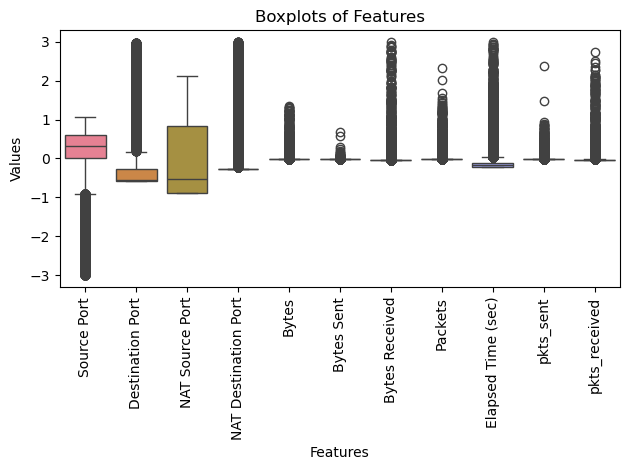

In [17]:
sns.boxplot(X_filtered)
plt.xticks(rotation = 90)
plt.xlabel('Features')
plt.ylabel('Values')
plt.title('Boxplots of Features')

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [18]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42, stratify=y_filtered)

In [19]:
y_train.value_counts()

0    27291
1    10960
2    10281
3       40
Name: Action, dtype: int64

In [20]:
y_test.value_counts()

0    6823
1    2741
2    2570
3      10
Name: Action, dtype: int64

In [21]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)  # Start with 5 neighbors
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [22]:
knn.get_params()

{'algorithm': 'auto',
 'leaf_size': 30,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': None,
 'n_neighbors': 5,
 'p': 2,
 'weights': 'uniform'}

In [23]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 2, 0])

In [24]:
from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6823
           1       0.99      1.00      1.00      2741
           2       1.00      1.00      1.00      2570
           3       1.00      0.00      0.00        10

    accuracy                           1.00     12144
   macro avg       1.00      0.75      0.75     12144
weighted avg       1.00      1.00      1.00     12144

[[6813   10    0    0]
 [   1 2732    8    0]
 [   0    0 2570    0]
 [   2    8    0    0]]


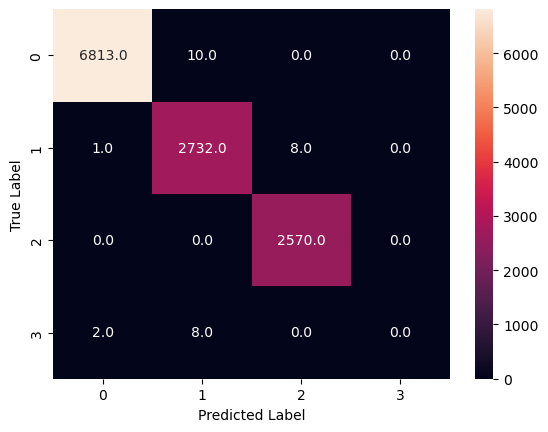

In [25]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt = '.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

The classification report and confusion matrix you've provided show excellent performance overall, with high precision, recall, and F1-score for most classes. However, there are some specific issues with class 3:

Class 3 Performance:

Precision and recall for class 3 are both 1.00, which indicates perfect predictions. However, the F1-score is 0.00 because there are no true positives (TP) for this class—meaning that none of the instances in class 3 were correctly predicted.
Macro Average:

The macro average F1-score is 0.75, which is significantly lower than the weighted average F1-score of 1.00. This discrepancy is due to the F1-score being 0 for class 3, pulling down the macro average.
Support:

Class 3 has a very small support (number of instances), which suggests that it might be an underrepresented or uncommon class in your dataset.

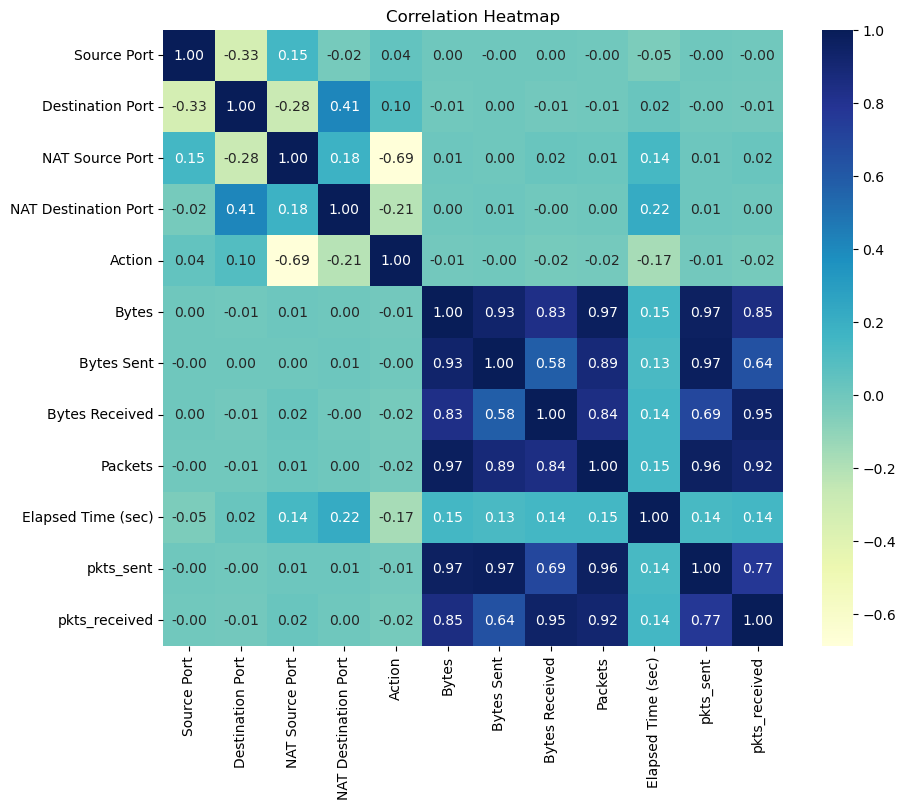

In [51]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f", annot_kws={"size": 10})
plt.title('Correlation Heatmap')
plt.show()

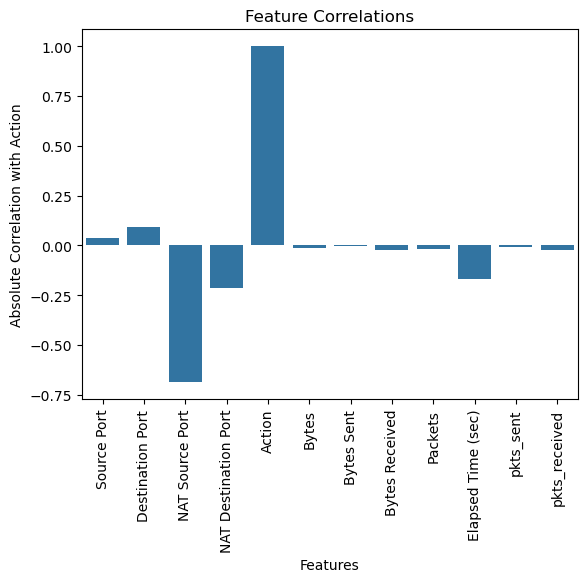

In [27]:
sns.barplot(x=correlation_matrix.index, y=correlation_matrix['Action'])
plt.xticks(rotation=90)
plt.xlabel('Features')
plt.ylabel('Absolute Correlation with Action')
plt.title('Feature Correlations')
plt.show()

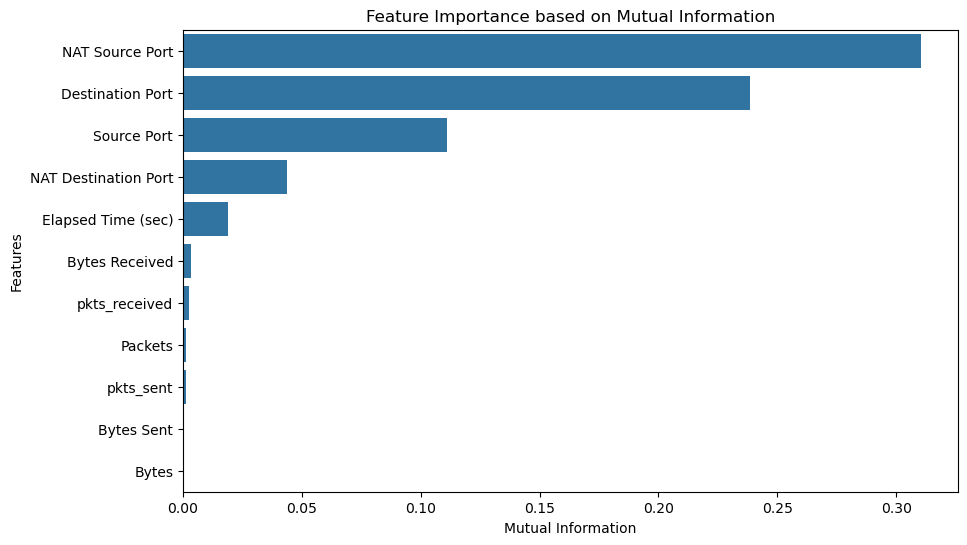

In [28]:
from sklearn.feature_selection import mutual_info_classif

mutual_info = mutual_info_classif(X, y)
feature_importance = pd.Series(mutual_info, index=X.columns)
feature_importance.sort_values(ascending=False, inplace=True)

# Plotting feature importance based on mutual information
plt.figure(figsize=(10, 6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel('Mutual Information')
plt.ylabel('Features')
plt.title('Feature Importance based on Mutual Information')
plt.show()

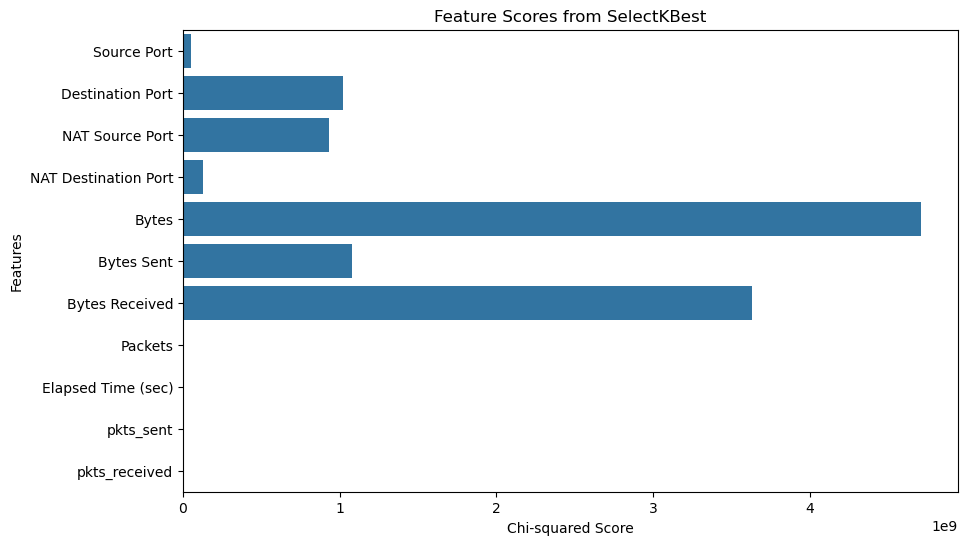

Selected features: Index(['Bytes', 'Bytes Sent', 'Bytes Received'], dtype='object')


In [29]:
from sklearn.feature_selection import SelectKBest, chi2 

selector = SelectKBest(score_func=chi2, k=3)  # Adjust k as needed
X_new = selector.fit_transform(X, y)

# Get selected feature names
selected_features = X.columns[selector.get_support()]

# Plotting selected feature scores
scores = selector.scores_
plt.figure(figsize=(10, 6))
sns.barplot(x=scores, y=X.columns)
plt.xlabel('Chi-squared Score')
plt.ylabel('Features')
plt.title('Feature Scores from SelectKBest')
plt.show()

# Print selected feature names
print("Selected features:", selected_features)

In [30]:
y_pred_prob = knn.predict_proba(X_test)

In [31]:
knn = KNeighborsClassifier(weights='distance')
knn.fit(X_train, y_train)

KNeighborsClassifier(weights='distance')

In [32]:
y_pred = knn.predict(X_test)
y_pred

array([1, 1, 0, ..., 0, 2, 0])

In [33]:
print(classification_report(y_test, y_pred, zero_division=1))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6823
           1       1.00      1.00      1.00      2741
           2       1.00      1.00      1.00      2570
           3       0.00      0.00      0.00        10

    accuracy                           1.00     12144
   macro avg       0.75      0.75      0.75     12144
weighted avg       1.00      1.00      1.00     12144

[[6818    4    0    1]
 [   0 2733    8    0]
 [   0    0 2570    0]
 [   2    8    0    0]]


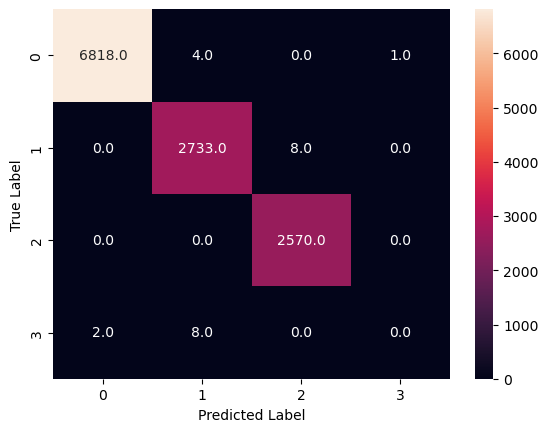

In [34]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

In [35]:
param_grid = {
    'n_neighbors': [3, 5, 7, 9],
    'p': [1, 2]
}

In [36]:
from sklearn.model_selection import GridSearchCV

# Initialize weighted KNN classifier
knn = KNeighborsClassifier(weights='distance')

# Define grid search
grid_search = GridSearchCV(knn, param_grid, cv=5, scoring='f1_macro')

# Perform grid search on training data
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best parameters found:", best_params)
print("Best cross-validation f1-score:", best_score)

Best parameters found: {'n_neighbors': 5, 'p': 2}
Best cross-validation f1-score: 0.7673964242732536


In [37]:
results = pd.DataFrame(grid_search.cv_results_)
results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_neighbors,param_p,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.072633,0.007099,0.177913,0.039911,3,1,"{'n_neighbors': 3, 'p': 1}",0.746373,0.747156,0.788667,0.803565,0.747133,0.766579,0.024575,4
1,0.065331,0.012697,0.223617,0.038115,3,2,"{'n_neighbors': 3, 'p': 2}",0.746399,0.747156,0.785360,0.803482,0.747273,0.765934,0.023957,5
2,0.070505,0.008508,0.165937,0.024188,5,1,"{'n_neighbors': 5, 'p': 1}",0.746606,0.747095,0.792008,0.803402,0.747322,0.767286,0.025097,2
3,0.076619,0.014356,0.198625,0.015544,5,2,"{'n_neighbors': 5, 'p': 2}",0.746724,0.747330,0.792280,0.803402,0.747246,0.767396,0.025106,1
4,0.072626,0.012385,0.159048,0.020959,7,1,"{'n_neighbors': 7, 'p': 1}",0.746370,0.746780,0.791769,0.803204,0.747227,0.767070,0.025098,3


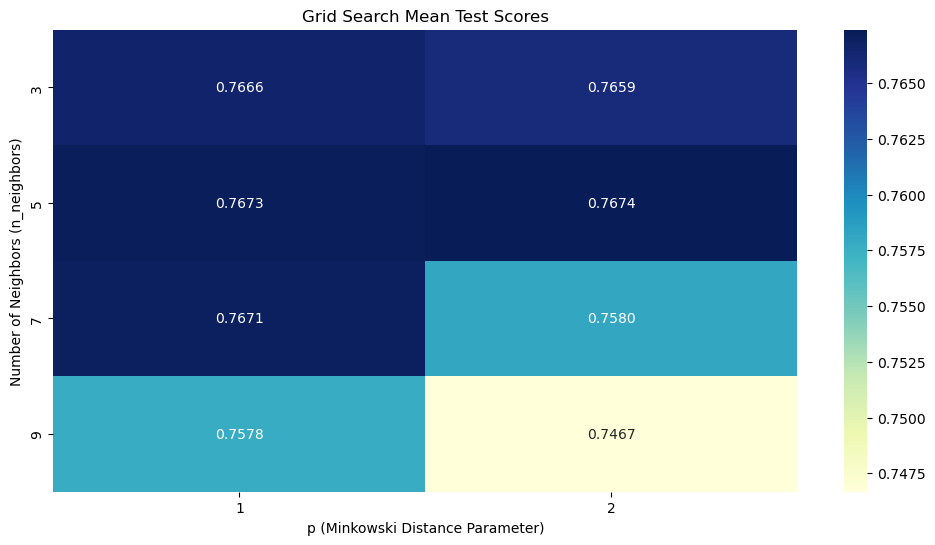

In [38]:
# Pivot the results DataFrame for easier plotting
results['param_n_neighbors'] = pd.to_numeric(results['param_n_neighbors'])
results['param_p'] = pd.to_numeric(results['param_p'])

# Pivot the results DataFrame for easier plotting
pivot_results = results.pivot(index='param_n_neighbors', columns='param_p', values='mean_test_score')

# Plot mean test score for different values of n_neighbors and p
plt.figure(figsize=(12, 6))
sns.heatmap(pivot_results, annot=True, fmt=".4f", cmap='YlGnBu')
plt.title('Grid Search Mean Test Scores')
plt.xlabel('p (Minkowski Distance Parameter)')
plt.ylabel('Number of Neighbors (n_neighbors)')
plt.show()

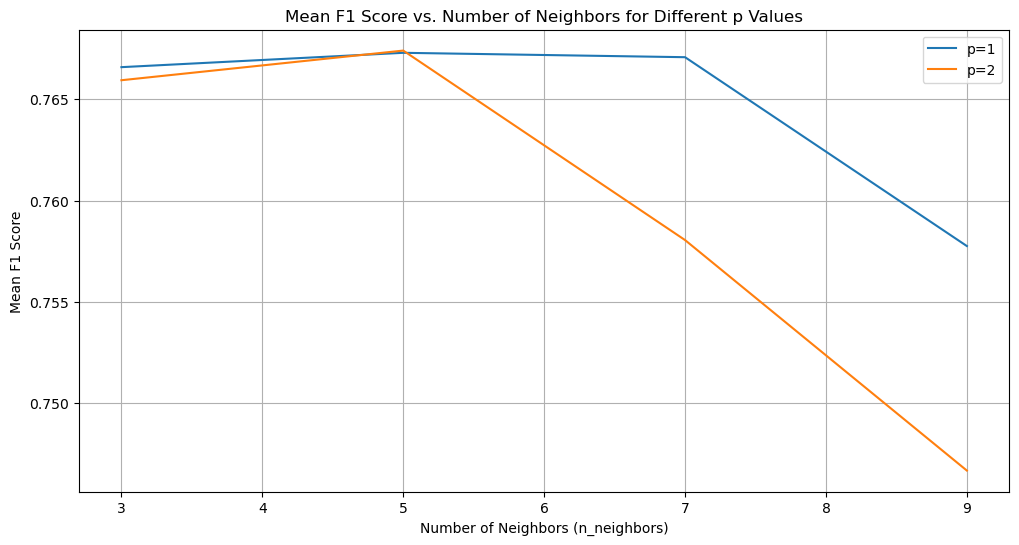

In [39]:
# Line plot for F1 scores
plt.figure(figsize=(12, 6))

for p_value in param_grid['p']:
    subset = results[results['param_p'] == p_value]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'p={p_value}')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score vs. Number of Neighbors for Different p Values')
plt.legend()
plt.grid(True)
plt.show()


In [40]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

from sklearn.metrics import classification_report, confusion_matrix

print(classification_report(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6823
           1       1.00      1.00      1.00      2741
           2       1.00      1.00      1.00      2570
           3       0.00      0.00      0.00        10

    accuracy                           1.00     12144
   macro avg       0.75      0.75      0.75     12144
weighted avg       1.00      1.00      1.00     12144

[[6818    4    0    1]
 [   0 2733    8    0]
 [   0    0 2570    0]
 [   2    8    0    0]]


In [41]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

grid_search.fit(X_train_resampled, y_train_resampled)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validated Weighted F1 Score: {best_score}")

Best Parameters: {'n_neighbors': 3, 'p': 1}
Best Cross-Validated Weighted F1 Score: 0.9928811873725119


C:\Users\Dell\AppData\Local\Temp\ipykernel_14296\876630161.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_results = results.pivot(index='param_n_neighbors', columns='param_p', values='mean_test_score')
C:\Users\Dell\AppData\Local\Temp\ipykernel_14296\876630161.py:2: FutureWarning: In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)
  pivot_results = results.pivot(index='param_n_neighbors', columns='param_p', values='mean_test_score')


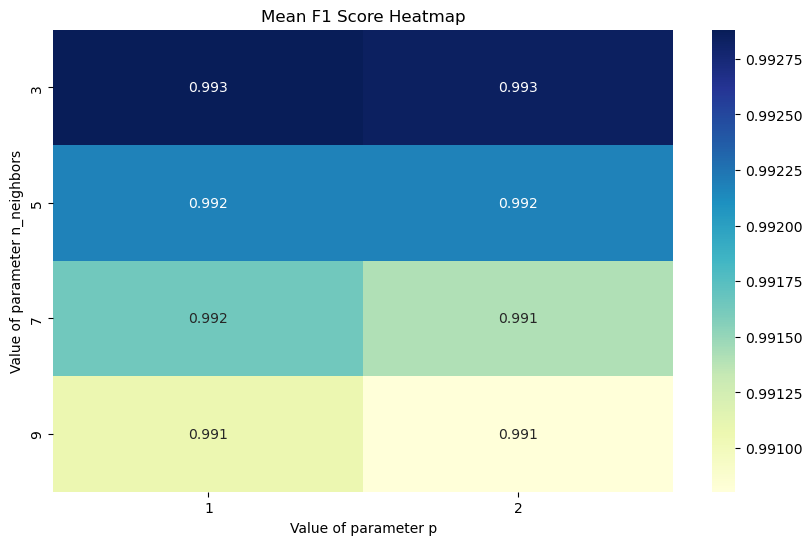

In [42]:
results = pd.DataFrame(grid_search.cv_results_)
pivot_results = results.pivot(index='param_n_neighbors', columns='param_p', values='mean_test_score')

plt.figure(figsize=(10, 6))
sns.heatmap(pivot_results, annot=True, cmap='YlGnBu', fmt='.3f', cbar=True)
plt.title('Mean F1 Score Heatmap')
plt.xlabel('Value of parameter p')
plt.ylabel('Value of parameter n_neighbors')
plt.show()


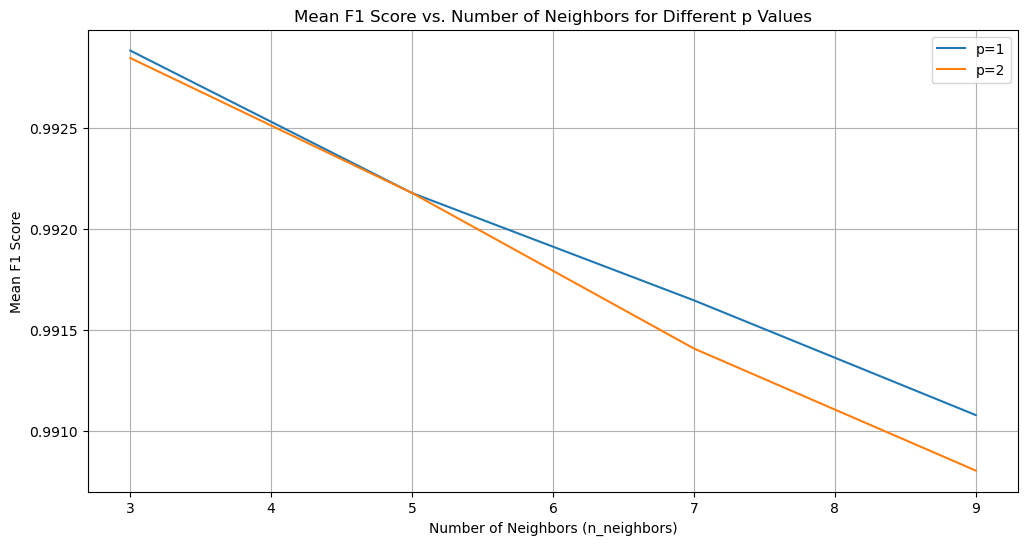

In [52]:
# Line plot for F1 scores
plt.figure(figsize=(12, 6))

for p_value in param_grid['p']:
    subset = results[results['param_p'] == p_value]
    plt.plot(subset['param_n_neighbors'], subset['mean_test_score'], label=f'p={p_value}')

plt.xlabel('Number of Neighbors (n_neighbors)')
plt.ylabel('Mean F1 Score')
plt.title('Mean F1 Score vs. Number of Neighbors for Different p Values')
plt.legend()
plt.grid(True)
plt.show()

In [43]:
best_knn = grid_search.best_estimator_
y_pred = best_knn.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6823
           1       1.00      0.98      0.99      2741
           2       1.00      1.00      1.00      2570
           3       0.08      0.40      0.14        10

    accuracy                           0.99     12144
   macro avg       0.77      0.85      0.78     12144
weighted avg       1.00      0.99      1.00     12144

[[6815    3    0    5]
 [   0 2695    6   40]
 [   0    2 2568    0]
 [   0    6    0    4]]


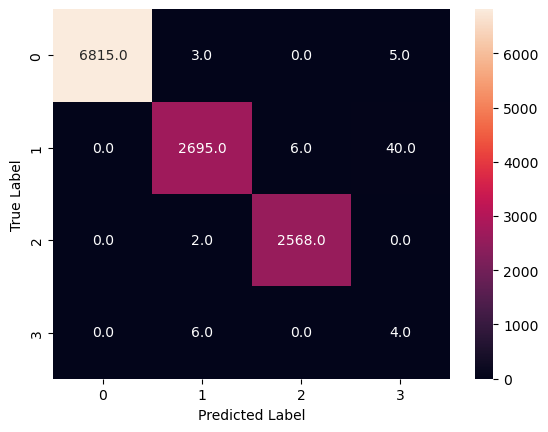

In [44]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot = True, fmt = '.1f')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

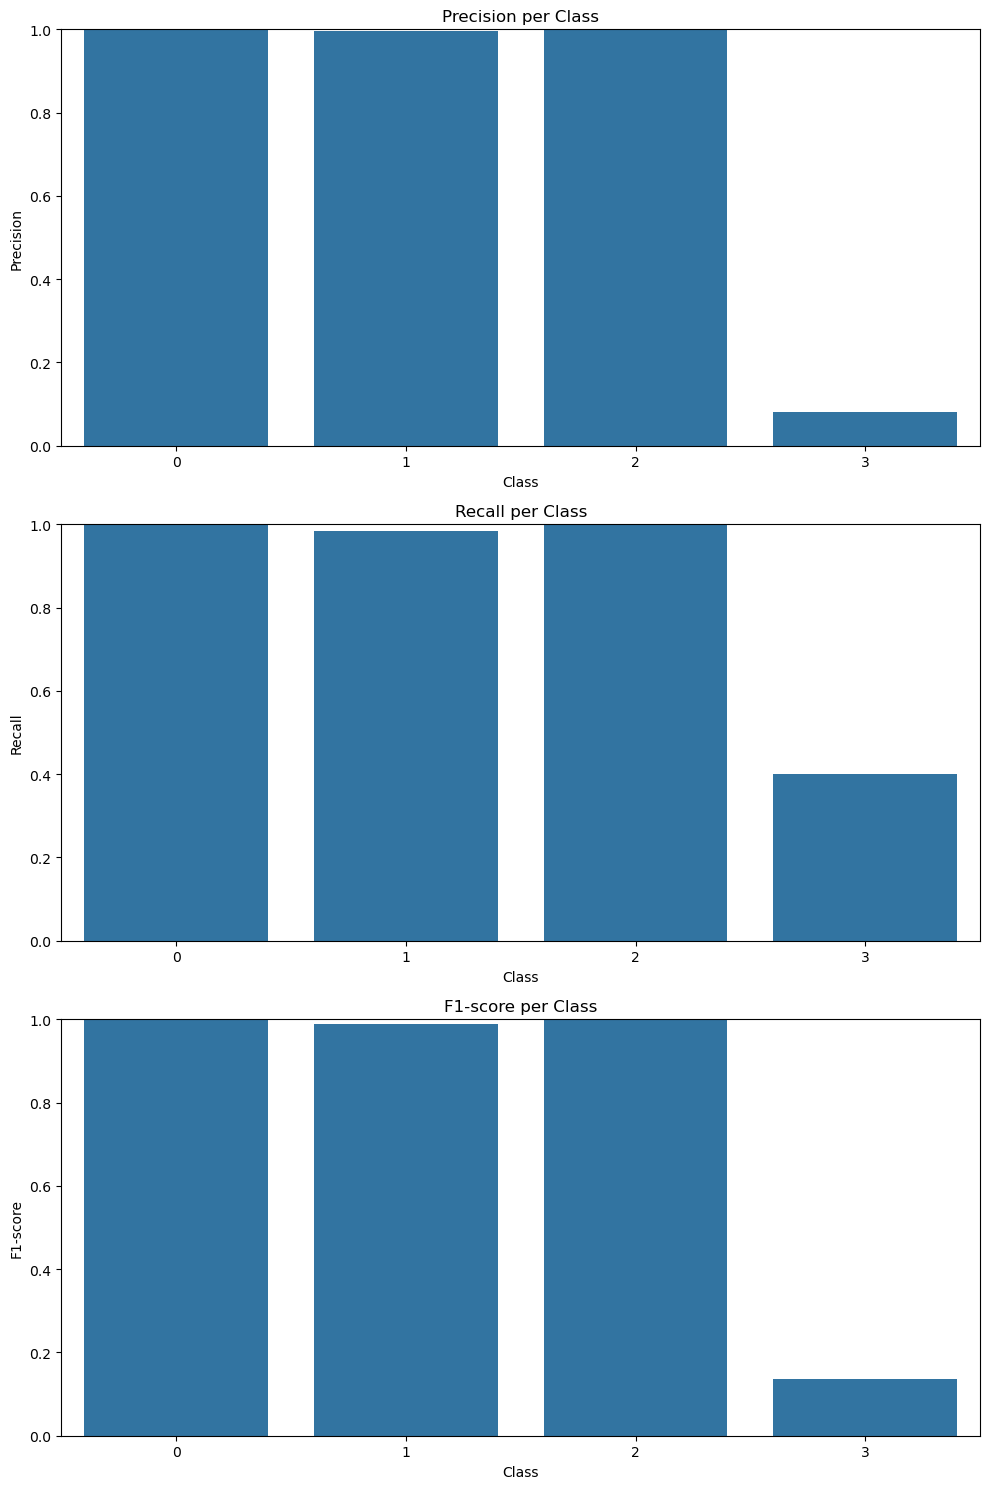

In [53]:
# Plotting Classification Report Metrics
report = classification_report(y_test, y_pred, output_dict=True)
report_df = pd.DataFrame(report).transpose()
report_df = report_df.iloc[:4,:]

fig, ax = plt.subplots(3, 1, figsize=(10, 15))
sns.barplot(x=report_df.index, y=report_df['precision'], ax=ax[0])
ax[0].set_title('Precision per Class')
ax[0].set_xlabel('Class')
ax[0].set_ylabel('Precision')
ax[0].set_ylim(0, 1)

sns.barplot(x=report_df.index, y=report_df['recall'], ax=ax[1])
ax[1].set_title('Recall per Class')
ax[1].set_xlabel('Class')
ax[1].set_ylabel('Recall')
ax[1].set_ylim(0, 1)

sns.barplot(x=report_df.index, y=report_df['f1-score'], ax=ax[2])
ax[2].set_title('F1-score per Class')
ax[2].set_xlabel('Class')
ax[2].set_ylabel('F1-score')
ax[2].set_ylim(0, 1)

plt.tight_layout()
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

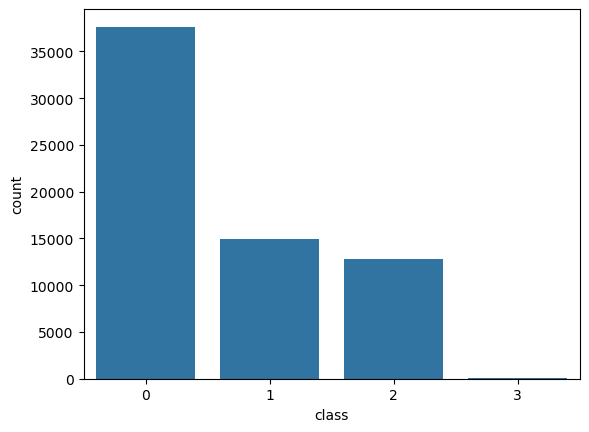

In [49]:

sns.barplot(y.value_counts())
plt.xlabel('class')
plt.ylabel('count')
plt.show
